In [1]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import random

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
Sep_data2 = rio.open('/home/vdo/Downloads/September_2018_All_Tugs_Hours_Geographic.tif')

In [4]:
data = Sep_data2.read(1)

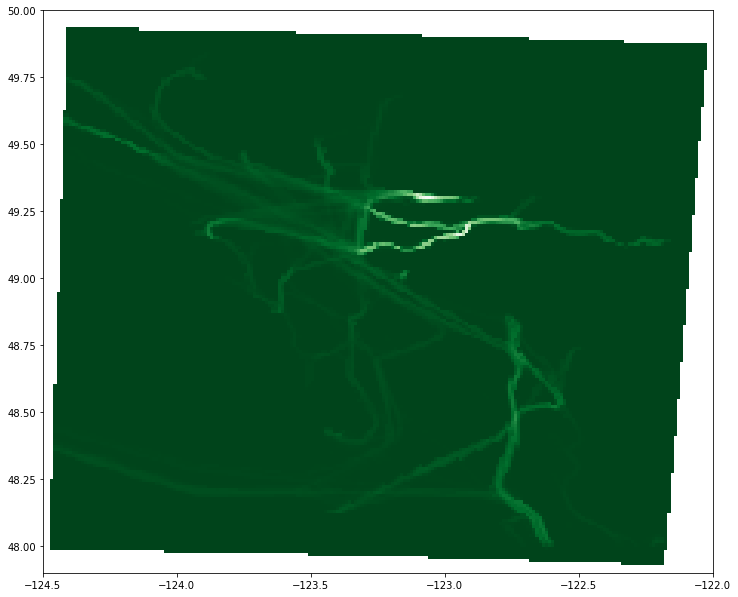

In [5]:
fig, ax = plt.subplots(figsize = (12,12))
show(Sep_data2, ax=ax, cmap = "Greens_r")
ax.set_xlim(-124.5, -122)
ax.set_ylim(47.9, 50);
#fig.savefig("/home/vdo/Pictures/tif_file.png", bbox_inches='tight');

In [6]:
Sep_data2.bounds

BoundingBox(left=-128.6649765716981, bottom=47.930315884019635, right=-121.91792896978994, top=51.02318999694867)

In [7]:
res = Sep_data2.res
print(res)

(0.011455089307144591, 0.011455089307144587)


In [8]:
lon, lat = Sep_data2.transform * (589,0)
print(lon, lat)

-121.91792896978994 51.02318999694867


In [23]:
lonlat_list = []
n=0
for x in np.arange(lon - res[0]/2, lon + res[0]/2, 0.0001):
    for y in np.arange(lat - res[1]/2, lat + res[1]/2, 0.0001):
        lonlat_list.append([x,y])
        n = n + 1
print(n)

13225


In [24]:
len(lonlat_list)

13225

In [25]:
index = random.choice(np.arange(0,13225,1))

In [26]:
lonlat_list[index]

[-121.92225651444346, 51.02376245229531]

In [34]:
index = random.choices(np.arange(0,13225,1),k=20)

-121.9176 51.025
-121.9166 51.0188
-121.9152 51.0212
-121.9171 51.0181
-121.9155 51.0245
-121.9224 51.0271
-121.9192 51.018
-121.9142 51.0184
-121.9193 51.0238
-121.9223 51.02
-121.9146 51.0208
-121.9216 51.0236
-121.9191 51.0223
-121.9211 51.0279
-121.9233 51.023
-121.9215 51.0189
-121.9201 51.0219
-121.9236 51.0214
-121.9159 51.0252
-121.9221 51.0279


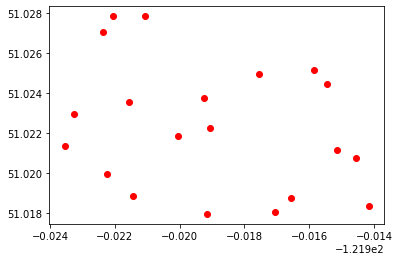

In [35]:
for i in index:
    print(np.round(lonlat_list[i][0], 4), np.round(lonlat_list[i][1], 4))
    plt.plot(lonlat_list[i][0], lonlat_list[i][1], 'ro')